In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pywt
import pandas as pd
import pickle as pkl
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [ ]:
DATA_POINTS_PER_REC=2560
TIME_PER_REC=0.1
SAMPLING_FREQ=25600 # 25.6 KHz

In [ ]:
def load_df(pkz_file):
    with open(pkz_file, 'rb') as f:
        df=pkl.load(f)
    return df

In [ ]:
pkz_file='/content/drive/MyDrive/Colab Notebooks/bearing1_1.pkz'
df=load_df(pkz_file)
df.head()

,hour,minute,second,microsecond,horiz accel,vert accel
0,9,39,39,65664.0,0.552,-0.146
1,9,39,39,65703.0,0.501,-0.480
2,9,39,39,65742.0,0.138,0.435
3,9,39,39,65781.0,-0.423,0.240
4,9,39,39,65820.0,-0.802,0.020


In [ ]:
nrows=df.shape[0]
nrecs=int(nrows/DATA_POINTS_PER_REC)
print(nrows, nrecs)

7175680 2803


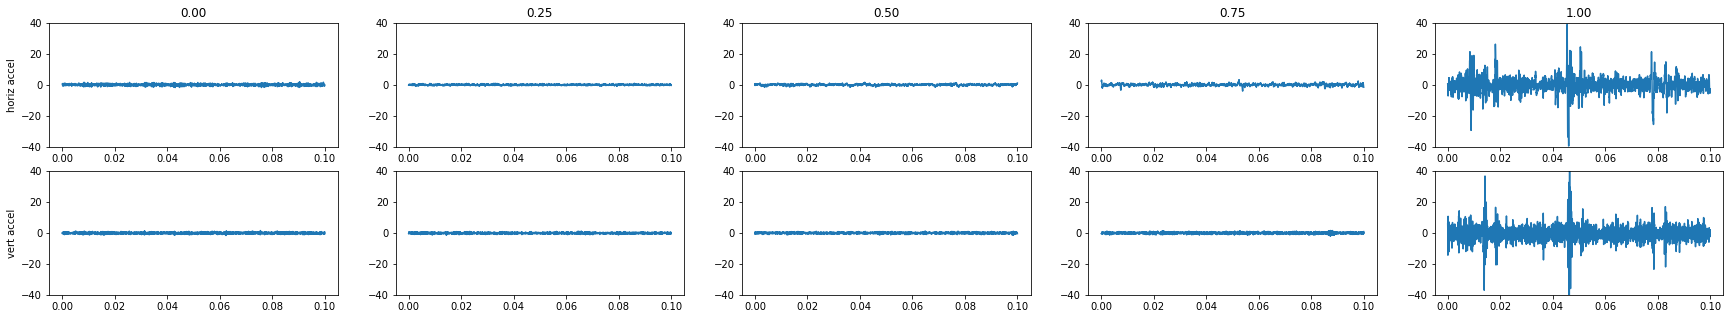

In [ ]:
t=np.linspace(0, TIME_PER_REC, DATA_POINTS_PER_REC)
rec_ids=np.linspace(0, nrecs-1, 5).astype(int)
fig,ax=plt.subplots(2, 5, figsize=[30,5])
ax[0,0].set_ylabel('horiz accel')
ax[1,0].set_ylabel('vert accel')
for i in range(len(rec_ids)):
    ax[0,i].set_title('{0:.2f}'.format(rec_ids[i]/nrecs))
    ax[0,i].plot(t, df['horiz accel'].values[DATA_POINTS_PER_REC*rec_ids[i]:DATA_POINTS_PER_REC*(rec_ids[i]+1)])
    ax[0,i].set_ylim([-40,40])
    ax[1,i].plot(t, df['vert accel'].values[DATA_POINTS_PER_REC*rec_ids[i]:DATA_POINTS_PER_REC*(rec_ids[i]+1)])
    ax[1,i].set_ylim([-40,40])

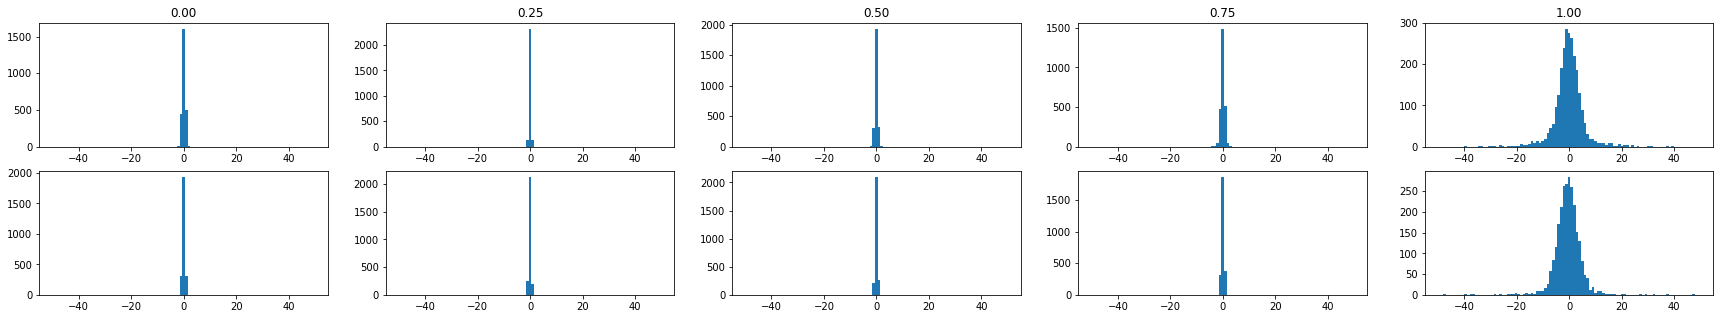

In [ ]:
fig,ax=plt.subplots(2, 5, figsize=[30,5])
for i in range(len(rec_ids)):
    ax[0,i].set_title('{0:.2f}'.format(rec_ids[i]/nrecs))
    n,_,_=ax[0,i].hist(df['horiz accel'].values[DATA_POINTS_PER_REC*rec_ids[i]:DATA_POINTS_PER_REC*(rec_ids[i]+1)], bins=np.linspace(-50, 50, 100))
    assert sum(n)==DATA_POINTS_PER_REC
    n,_,_=ax[1,i].hist(df['vert accel'].values[DATA_POINTS_PER_REC*rec_ids[i]:DATA_POINTS_PER_REC*(rec_ids[i]+1)], bins=np.linspace(-50, 50, 100))
    assert sum(n)==DATA_POINTS_PER_REC

### Animate changes in vibration signals

In [ ]:
fig,ax=plt.subplots(1, 1)
t=np.linspace(0, TIME_PER_REC, DATA_POINTS_PER_REC)
ax.set_xlim([t.min(), t.max()])
ax.set_ylim([-40, 40])
line, =ax.plot([], [])

def init():
    line.set_data([], [])
    return line,

def animate(i):
    line.set_data(t, df['horiz accel'].values[DATA_POINTS_PER_REC*i:DATA_POINTS_PER_REC*(i+1)])
    return line,

anim=FuncAnimation(fig, animate, init_func=init, frames=np.linspace(0, nrecs-1, 500).astype(int), blit=True)
plt.close(anim._fig)

In [ ]:
HTML(anim.to_html5_video())

### CWT features

In [ ]:
fig,ax=plt.subplots(1, 5, figsize=[30,5])
for i in range(len(rec_ids)):
    sample_data=df['horiz accel'].values[DATA_POINTS_PER_REC*rec_ids[i]:DATA_POINTS_PER_REC*(rec_ids[i]+1)]
    coef, freqs=pywt.cwt(sample_data,np.linspace(0.1,50,128),'morl')
    ax[i].imshow(coef)
    ax[i].set_title('{0:.2f}'.format(rec_ids[i]/nrecs))

plt.show()